# Diabetes Social Network

In [2]:
import pandas as pd
import json
import networkx as nx 
import matplotlib.pyplot as plt

In [151]:
DIAGNOSES_ICD = pd.read_csv('DIAGNOSES_ICD.csv')
D_ICD_DIAGNOSES = pd.read_csv('D_ICD_DIAGNOSES.csv')
test_code = '25000'
diabetic_patients = []
for index, row in DIAGNOSES_ICD.iterrows():
    code = str(row['ICD9_CODE'])
    if(code == test_code):
        diabetic_patients.append(row['HADM_ID'])
diabetic_patients = set(diabetic_patients)
#print(diabetic_patients)
print(len(diabetic_patients))

9057


Ther are 9057 individual hospital stays in which a patient was diagnosed with the icd9 code 250.00 - diabetes mellitus with complication

In [152]:
Patient_lib = {}

#create patient code library
for index, row in DIAGNOSES_ICD.iterrows():
    code = row['ICD9_CODE']
    patient = row['HADM_ID']
    if(patient in diabetic_patients):
        Patient_lib.setdefault(patient, []).append(code)
#print(Patient_lib)            



In [153]:
#num_codes = []
icd_codes = []
Edge_lib = {}

#i = 0
#for num in num_codes:     
#    num_codes[i] = num/4
#    i = i+1

#Edges in network + weights
for patient, codes_list in Patient_lib.items():           
        patient_codes = []
        for code in codes_list:
            patient_codes.append(code)
        if(len(patient_codes) > 1):           
            if (test_code,code) in Edge_lib:
                Edge_lib[(test_code,code)] += 1
            else:
                Edge_lib[(test_code,code)] = 1

In [154]:
Filter_edge_lib = {}
for code_tuple, weighted in Edge_lib.items():  
    if(weighted > 100):
        Filter_edge_lib[code_tuple] = weighted
        if(code_tuple[1] not in icd_codes):
            icd_codes.append(code_tuple[1])

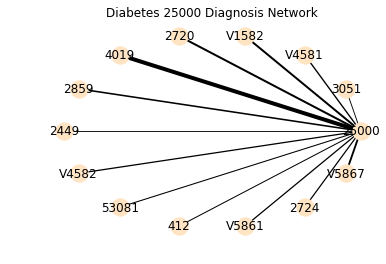

In [155]:
#Draw Network
labels = {}
all_weights = []

G = nx.Graph()
G.add_nodes_from(icd_codes)
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G,pos,node_color='bisque')#,node_size=num_codes

for node_name in icd_codes:
    labels[str(node_name)] = str(node_name)

nx.draw_networkx_labels(G,pos,labels,font_size=12)

for code_tuple, weighted in Filter_edge_lib.items():   
    G.add_edge(code_tuple[0],code_tuple[1],weight=weighted)

for (node1,node2,data) in G.edges(data=True):
    all_weights.append(data['weight'])

unique_weights = list(set(all_weights))

for weight in unique_weights:
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in
                      G.edges(data=True) if edge_attr['weight']==weight]
    width = weight*len(icd_codes)*2.0/sum(all_weights)
    nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)

plt.axis('off')
plt.title('Diabetes ' + test_code + ' Diagnosis Network')
plt.savefig(test_code + "_code_connections.png",dpi=(200)) 
plt.show()

In [156]:
for node_name in icd_codes:
    for index,row in D_ICD_DIAGNOSES.iterrows():
        if(node_name == row["ICD9_CODE"]):
            print(node_name, row["SHORT_TITLE"])

25000 DMII wo cmp nt st uncntr
3051 Tobacco use disorder
V4581 Aortocoronary bypass
V1582 History of tobacco use
2720 Pure hypercholesterolem
4019 Hypertension NOS
2859 Anemia NOS
2449 Hypothyroidism NOS
V4582 Status-post ptca
53081 Esophageal reflux
412 Old myocardial infarct
V5861 Long-term use anticoagul
2724 Hyperlipidemia NEC/NOS
V5867 Long-term use of insulin
